## Group 2A11
- 

## Group Contributions Statement

In [3]:
penguins

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,120,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,PAL0910,121,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832,NaN
341,PAL0910,122,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,NaN
342,PAL0910,123,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,NaN


## Data Import and Cleaning

In [4]:
#imports
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
from sklearn.model_selection import train_test_split

#getting the data
url = "https://philchodrow.github.io/PIC16A/datasets/palmer_penguins.csv"
penguins = pd.read_csv(url)


#splitting the data set
X=penguins[["Culmen Depth (mm)", "Body Mass (g)", "Island"]]
y=penguins["Species"]


X_train,X_test=train_test_split(X,test_size=.2)
y_train,y_test=train_test_split(y,test_size=.2)

X_train

,Culmen Depth (mm),Body Mass (g),Island
195,17.0,3500.0,Dream
181,20.0,4550.0,Dream
177,19.0,4150.0,Dream
315,15.7,5200.0,Biscoe
320,15.0,4850.0,Biscoe
...,...,...,...
271,14.1,5300.0,Biscoe
41,18.4,3900.0,Dream
115,18.3,4075.0,Biscoe
286,14.4,4650.0,Biscoe


In [5]:
#simplify species names
y_train=y_train.str.split().str.get(0)
y_test=y_test.str.split().str.get(0)

X_train #currently has 275 rows
#get rid of nans. is it possible to have nans in different rows for culmen depth and body mass, 
#would that affect data cleaning

X_train=X_train.dropna()  #273
X_test=X_test.dropna()
y_train=y_train.dropna()  #273
y_test=y_test.dropna()

#changing species names to numbers
y_train=le.fit_transform(y_train)
y_test=le.fit_transform(y_test)   #do we need to shorten names and change numbers?




#X_train[X_train["Culmen Depth (mm)"]==np.nan] #no nan values in X_train or X_test

## Exploratory Analysis

AttributeError: 'numpy.ndarray' object has no attribute 'hist'

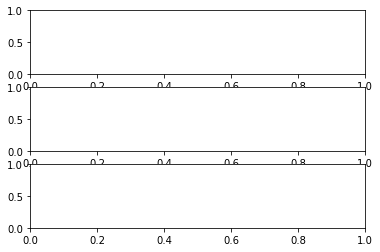

In [6]:
#histogram of body mass separated by island
fig, ax = plt.subplots(3, 1)
penguins[["Body Mass (g)", "Island"]].groupby(["Island"]).apply(ax.hist, alpha = 0.5)

### Figure 1. Histogram

Here we will use a Histogram to examine how the body mass of each penguin differs across the various islands. 

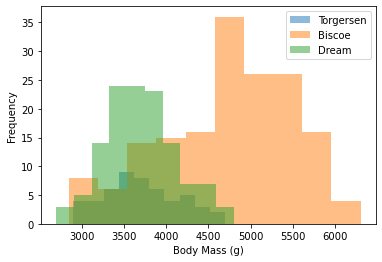

In [7]:
#histogram, body mass of each penguin grouped by island

fig,ax = plt.subplots(1)
ax.set(xlabel = "Body Mass (g)",
       ylabel = "Frequency")

Islands=penguins["Island"].unique()
for i in Islands:
    test = penguins[penguins["Island"]==i]
    ax.hist(test["Body Mass (g)"], alpha = 0.5, label = i)
fig
ax.legend()

## Feature Selection

## Modeling

## Discussion